In [1]:
import pandas as pd
import numpy as np
import sklearn

In [19]:
small_data = pd.read_csv('small_data.csv')
target_names = ['2_8degC', 'RT', 'BHT', '-20degC']
small_data

,Sample,Group,Dimethylglycine_HMDB0000092,Glyoxylic acid_HMDB0000119,Pyruvic acid_HMDB0000243,L-Lactic acid_HMDB0000190,Alpha-Hydroxyisobutyric acid_HMDB0000729,Glycolic acid_HMDB0000115,Caproic acid_HMDB0000535,L-Alanine_HMDB0000161,...,Sucrose_HMDB0000258,MG(18:0e/0:0/0:0)_HMDB0011143,Trehalose_HMDB0000975,D-Maltose_HMDB0000163,Lactitol_HMDB0040937,Xanthylic acid_HMDB0001554,Adenosine monophosphate_HMDB0000045,Cholesterol_HMDB0000067,Lathosterol_HMDB0001170,7b-Hydroxycholesterol_ HMDB0006119
0,HP 2_8degC_1,2_8degC,1426172,1591380,100740,1972502,80250,3891814,2386481,513996,...,1582940,226467,2250788,856000,38063,364001,7301,5644816,23558,525597
1,HP 2_8degC_2,2_8degC,1517956,1686277,142948,2729996,85646,6069966,2952691,517222,...,1453751,279571,439349,205406,39952,134353,14407,6020618,23632,535842
2,HP 2_8degC_3,2_8degC,1664485,1827098,130359,2211164,94101,5831749,2782558,567592,...,1360706,251630,366872,158065,51457,195269,7742,6263993,24783,554371
3,HP 2_8degC_4,2_8degC,1159526,1294607,93469,1557122,63105,4042984,1781499,448708,...,699933,191838,224136,76907,39453,407070,5052,5277272,18253,480930
4,HP RT_1,RT,676603,762540,174855,3666034,96213,3692688,1314990,774759,...,2377553,239961,2110805,831730,50190,9796,1551,5116960,20178,428768
5,HP RT_2,RT,727034,807206,126424,2724566,66314,3069220,709370,698348,...,1849690,158963,512520,216781,46054,129625,1199,5653514,21400,316166
6,HP RT_3,RT,751274,832044,150530,4151215,87792,3886825,1073135,856665,...,1640040,230621,572257,232393,51065,50165,3331,6235203,25484,443281
7,HP RT_4,RT,593974,644762,149130,4112542,94976,4503385,658502,791352,...,1702734,261009,611152,255378,53199,6913,1454,6238185,28553,435282
8,HP RT_BHT_1,BHT,560734,625327,128295,2821701,88315,3315107,655856,579283,...,2555027,292232,405252,170659,43887,4526,113,6015531,34844,10153
9,HP RT_BHT_2,BHT,645725,690614,165197,2506349,90194,5603085,976099,546050,...,2743023,281899,478809,209904,53412,24346,2641,7386359,37677,13283


In [60]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

X = small_data.iloc[:,2:]
scaler = MinMaxScaler()
scaler.fit(X)
X_centered = scaler.transform(X)

y = small_data['Group']
y = pd.factorize(y)[0]
pca = PCA(n_components=5)
pca.fit(X_centered)

X_PCA = pca.transform(X_centered)
print(pca.explained_variance_ratio_)
print(sum(pca.explained_variance_ratio_))
print(pca.singular_values_)

[0.42186834 0.20961367 0.10486136 0.05276885 0.04340681]
0.832519031135174
[10.24149086  7.21912418  5.10601924  3.6221259   3.28513817]


In [4]:
# X = small_data.iloc[:,2:]
# scaler = MinMaxScaler()
# scaler.fit(X)
# X_centered = scaler.transform(X)

# y = small_data['Group']
# y = pd.factorize(y)[0]
# pca = PCA(n_components=5)
# pca.fit(X)
# print(pca.explained_variance_ratio_)
# print(sum(pca.explained_variance_ratio_))

## explained variance by the first 5 PCs decreases if I centered the columns... why?

## X PCA with LOO

In [5]:
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import classification_report

loo = LeaveOneOut()
loo.get_n_splits(X_centered)


y_pred = []
loo_decision_func = []
for train_index, test_index in loo.split(X_PCA):
#     print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X_PCA[train_index], X_PCA[test_index]
    y_train, y_test = y[train_index], y[test_index]

    lsvc = LinearSVC(C = 0.05)
    lsvc.fit(X_train, y_train)
#     print('true:',y_test)
    pred = lsvc.predict(X_test)
    y_pred.append(pred[0])
#     print('predicted: ',pred)
    dec_func = lsvc.decision_function(X_test)
#     print('decision function:',dec_func)
    loo_decision_func.append(dec_func[0])


print('Predicted: ',y_pred)
print('True:',y)
print('\n')
print(classification_report(y,y_pred,zero_division=0,target_names=target_names))
loo_decision_func_df = pd.DataFrame(loo_decision_func)
loo_decision_func_df

Predicted:  [3, 3, 3, 3, 1, 1, 1, 1, 2, 2, 2, 0, 0, 0, 0]
True: [0 0 0 0 1 1 1 1 2 2 2 3 3 3 3]


              precision    recall  f1-score   support

     2_8degC       0.00      0.00      0.00         4
          RT       1.00      1.00      1.00         4
         BHT       1.00      1.00      1.00         3
     -20degC       0.00      0.00      0.00         4

    accuracy                           0.47        15
   macro avg       0.50      0.50      0.50        15
weighted avg       0.47      0.47      0.47        15



,0,1,2,3
0,-0.120195,-0.424001,-0.798590,0.220667
1,0.142751,-0.607779,-0.815520,0.388347
2,0.124761,-0.695165,-0.647046,0.176350
3,-0.199260,-0.690649,-0.666361,0.669718
4,-0.618334,0.827869,-0.483706,-0.642065
5,-0.531429,0.605441,-0.279637,-0.615702
6,-0.493970,1.164869,-0.512412,-1.033142
7,-0.529012,0.943819,-0.265167,-1.035878
8,-0.746038,-0.152191,0.668488,-0.335868
9,-0.783934,-0.351225,0.873206,-0.401651


In [33]:
list(y)

[0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 3, 3, 3, 3]

In [21]:
pd.DataFrame({'Prediction':y_pred,'True':y})

,Prediction,True
0,3,0
1,3,0
2,3,0
3,3,0
4,1,1
5,1,1
6,1,1
7,1,1
8,2,2
9,2,2


In [16]:
loo_decision_func_df = pd.DataFrame(loo_decision_func)
# loo_decision_func_df
loo_decision_func_df.to_csv('loo_decicion_function_PCA.csv')

In [12]:
print(y_pred)
print(y)

[3, 3, 3, 3, 1, 1, 1, 1, 2, 2, 2, 0, 0, 0, 0]
[0 0 0 0 1 1 1 1 2 2 2 3 3 3 3]


## X PCA without LOO

In [9]:
lsvc = LinearSVC(C = 0.05)
lsvc.fit(X_PCA, y)
lsvc.decision_function(X_PCA)
print('Accuracy: ',lsvc.score(X_PCA, y))
print('Prediction: ',lsvc.predict(X_PCA))
print('True: ',y)
print('\n')
print(classification_report(y,lsvc.predict(X_PCA),zero_division=0,target_names=target_names))
pd.DataFrame({'Prediction':y_pred,'True':y})

Accuracy:  0.7333333333333333
Prediction:  [3 0 0 3 1 1 1 1 2 2 2 3 3 0 0]
True:  [0 0 0 0 1 1 1 1 2 2 2 3 3 3 3]


              precision    recall  f1-score   support

     2_8degC       0.50      0.50      0.50         4
          RT       1.00      1.00      1.00         4
         BHT       1.00      1.00      1.00         3
     -20degC       0.50      0.50      0.50         4

    accuracy                           0.73        15
   macro avg       0.75      0.75      0.75        15
weighted avg       0.73      0.73      0.73        15



,Prediction,True
0,3,0
1,3,0
2,3,0
3,3,0
4,1,1
5,1,1
6,1,1
7,1,1
8,2,2
9,2,2


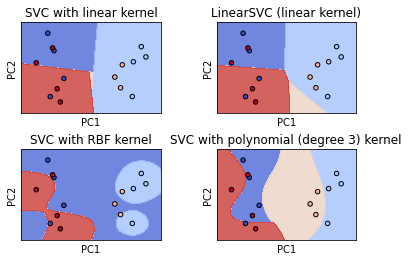

In [63]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets


def make_meshgrid(x, y, h=0.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out


# import some data to play with
iris = datasets.load_iris()
# Take the first two features. We could avoid this by using a two-dim dataset
# X, y = make_blobs(n_samples=15, centers=4, random_state=4)
# y = np.array([0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0])
X = X_PCA[:,0:2]
# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 0.05  # SVM regularization parameter
models = (
    svm.SVC(kernel="linear", C=C),
    svm.LinearSVC(C=C),
    svm.SVC(kernel="rbf", gamma=0.7, C=C),
    svm.SVC(kernel="poly", degree=3, gamma="auto", C=C),
)
models = (clf.fit(X, y) for clf in models)

# title for the plots
titles = (
    "SVC with linear kernel",
    "LinearSVC (linear kernel)",
    "SVC with RBF kernel",
    "SVC with polynomial (degree 3) kernel",
)

# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors="k")
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel("PC1")
    ax.set_ylabel("PC2")
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()

In [47]:
X, y = make_blobs(n_samples=15, centers=2, random_state=777)
y

array([0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0])

D:\anaconda\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


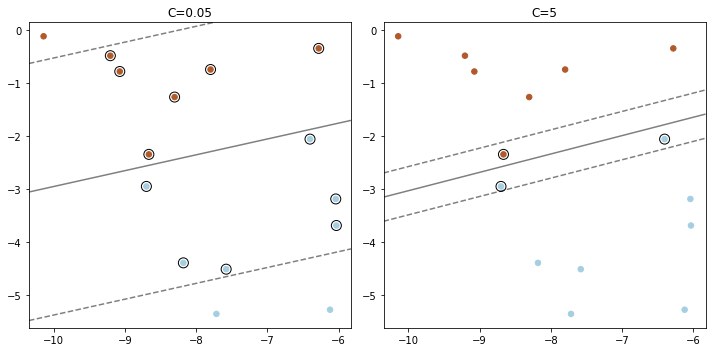

In [73]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.svm import LinearSVC

X, y = make_blobs(n_samples=15, centers=2, random_state=777)


plt.figure(figsize=(10, 5))
for i, C in enumerate([0.05,5]):
    # "hinge" is the standard SVM loss
    clf = LinearSVC(C=C).fit(X, y)
    # obtain the support vectors through the decision function
    decision_function = clf.decision_function(X)
    # we can also calculate the decision function manually
    # decision_function = np.dot(X, clf.coef_[0]) + clf.intercept_[0]
    # The support vectors are the samples that lie within the margin
    # boundaries, whose size is conventionally constrained to 1
    support_vector_indices = np.where(np.abs(decision_function) <= 1 + 1e-15)[0]
    support_vectors = X[support_vector_indices]

    plt.subplot(1, 2, i + 1)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    xx, yy = np.meshgrid(
        np.linspace(xlim[0], xlim[1], 50), np.linspace(ylim[0], ylim[1], 50)
    )
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(
        xx,
        yy,
        Z,
        colors="k",
        levels=[-1, 0, 1],
        alpha=0.5,
        linestyles=["--", "-", "--"],
    )
    plt.scatter(
        support_vectors[:, 0],
        support_vectors[:, 1],
        s=100,
        linewidth=1,
        facecolors="none",
        edgecolors="k",
    )
    plt.title("C=" + str(C))
plt.tight_layout()
plt.show()

In [74]:
X, y = make_blobs(n_samples=15, centers=2, random_state=777)
y

array([0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0])

D:\anaconda\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


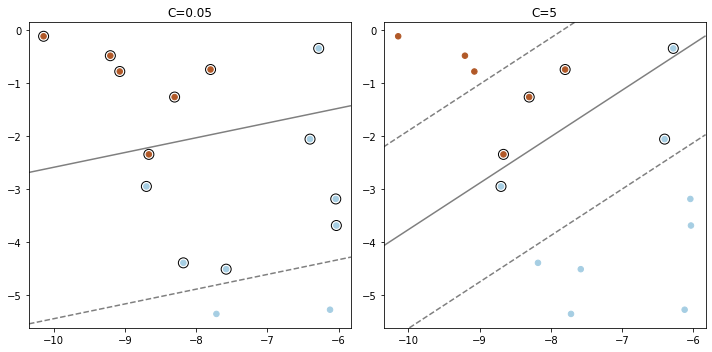

In [76]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.svm import LinearSVC

X, y = make_blobs(n_samples=15, centers=2, random_state=777)
y = np.array([0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0])

plt.figure(figsize=(10, 5))
for i, C in enumerate([0.05,5]):
    # "hinge" is the standard SVM loss
    clf = LinearSVC(C=C).fit(X, y)
    # obtain the support vectors through the decision function
    decision_function = clf.decision_function(X)
    # we can also calculate the decision function manually
    # decision_function = np.dot(X, clf.coef_[0]) + clf.intercept_[0]
    # The support vectors are the samples that lie within the margin
    # boundaries, whose size is conventionally constrained to 1
    support_vector_indices = np.where(np.abs(decision_function) <= 1 + 1e-15)[0]
    support_vectors = X[support_vector_indices]

    plt.subplot(1, 2, i + 1)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    xx, yy = np.meshgrid(
        np.linspace(xlim[0], xlim[1], 50), np.linspace(ylim[0], ylim[1], 50)
    )
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(
        xx,
        yy,
        Z,
        colors="k",
        levels=[-1, 0, 1],
        alpha=0.5,
        linestyles=["--", "-", "--"],
    )
    plt.scatter(
        support_vectors[:, 0],
        support_vectors[:, 1],
        s=100,
        linewidth=1,
        facecolors="none",
        edgecolors="k",
    )
    plt.title("C=" + str(C))
plt.tight_layout()
plt.show()

D:\anaconda\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
D:\anaconda\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


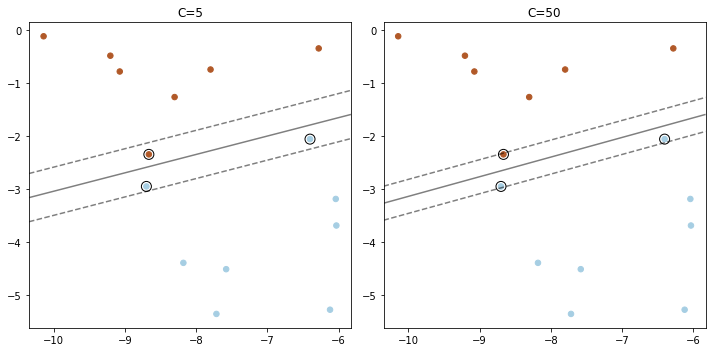

In [68]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.svm import LinearSVC

X, y = make_blobs(n_samples=15, centers=2, random_state=777)
# y = np.array([0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0])

plt.figure(figsize=(10, 5))
for i, C in enumerate([5,50]):
    # "hinge" is the standard SVM loss
    clf = LinearSVC(C=C).fit(X, y)
    # obtain the support vectors through the decision function
    decision_function = clf.decision_function(X)
    # we can also calculate the decision function manually
    # decision_function = np.dot(X, clf.coef_[0]) + clf.intercept_[0]
    # The support vectors are the samples that lie within the margin
    # boundaries, whose size is conventionally constrained to 1
    support_vector_indices = np.where(np.abs(decision_function) <= 1 + 1e-15)[0]
    support_vectors = X[support_vector_indices]

    plt.subplot(1, 2, i + 1)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    xx, yy = np.meshgrid(
        np.linspace(xlim[0], xlim[1], 50), np.linspace(ylim[0], ylim[1], 50)
    )
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(
        xx,
        yy,
        Z,
        colors="k",
        levels=[-1, 0, 1],
        alpha=0.5,
        linestyles=["--", "-", "--"],
    )
    plt.scatter(
        support_vectors[:, 0],
        support_vectors[:, 1],
        s=100,
        linewidth=1,
        facecolors="none",
        edgecolors="k",
    )
    plt.title("C=" + str(C))
plt.tight_layout()
plt.show()

In [13]:
lsvc.decision_function(X_PCA)

array([[-0.01281336, -0.48187581, -0.81789604,  0.10314266],
       [ 0.38984785, -0.73268381, -0.86870386, -0.01508003],
       [ 0.27961497, -0.75413783, -0.70949894, -0.0329493 ],
       [ 0.1162293 , -0.78509551, -0.75412536,  0.1895211 ],
       [-0.70737963,  0.87738848, -0.60414878, -0.73891049],
       [-0.6741217 ,  0.74577892, -0.49900898, -0.74120562],
       [-0.6355351 ,  1.16486085, -0.6488325 , -1.03314497],
       [-0.64876643,  0.96220013, -0.45199127, -1.03587778],
       [-0.85841939, -0.55358124,  0.81518477, -0.63697706],
       [-0.867135  , -0.60613418,  0.9220332 , -0.63392088],
       [-0.82467063, -0.45110712,  0.6931373 , -0.60711548],
       [-0.2973454 , -0.78729806, -0.6923441 ,  0.57115963],
       [-0.05180869, -0.82957446, -0.53742278,  0.21711344],
       [ 0.24496158, -0.79797845, -0.6776373 ,  0.00768257],
       [ 0.34735394, -1.17960595, -0.56875116,  0.14515509]])

In [14]:
decision_func = pd.DataFrame(lsvc.decision_function(X_PCA))
decision_func.to_csv('decision_function_LinearSVC_PCA.csv')

## X centered with LOO

In [39]:
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.model_selection import LeaveOneOut

loo = LeaveOneOut()
loo.get_n_splits(X_centered)

# print(loo)
y_pred = []
loo_decision_func = []
for train_index, test_index in loo.split(X_centered):
#     print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X_centered[train_index], X_centered[test_index]
    y_train, y_test = y[train_index], y[test_index]

    lsvc = LinearSVC(C = 0.05)
    lsvc.fit(X_train, y_train)
#     print('true:',y_test)
    pred = lsvc.predict(X_test)
    y_pred.append(pred[0])
#     print('predicted: ',pred)
    dec_func = lsvc.decision_function(X_test)
#     print('decision function:',dec_func)
    loo_decision_func.append(dec_func[0])
print('Predicted: ',y_pred)
print('True:',y)
print('\n')
print(classification_report(y,y_pred,zero_division=0,target_names=target_names))
loo_decision_func_df = pd.DataFrame(loo_decision_func)
loo_decision_func_df

Predicted:  [0, 3, 0, 3, 1, 1, 1, 1, 2, 2, 2, 0, 0, 0, 0]
True: [0 0 0 0 1 1 1 1 2 2 2 3 3 3 3]


              precision    recall  f1-score   support

     2_8degC       0.33      0.50      0.40         4
          RT       1.00      1.00      1.00         4
         BHT       1.00      1.00      1.00         3
     -20degC       0.00      0.00      0.00         4

    accuracy                           0.60        15
   macro avg       0.58      0.62      0.60        15
weighted avg       0.56      0.60      0.57        15



,0,1,2,3
0,-0.150201,-0.684077,-0.952233,-0.223216
1,-0.279844,-1.072897,-1.146738,0.086975
2,-0.081392,-1.015544,-0.953737,-0.225034
3,0.028387,-0.605871,-0.798364,0.097801
4,-0.758627,0.396431,-0.710320,-1.087784
5,-0.682611,0.510955,-0.416817,-0.963903
6,-0.917842,0.667883,-0.846376,-1.280933
7,-1.029060,0.352208,-0.561545,-1.115932
8,-0.870625,-0.137372,0.336995,-0.587430
9,-1.103143,-0.609465,0.218710,-0.757599


In [42]:
(130+144)/5

54.8

In [23]:
lsvc = LinearSVC(C = 0.05)
lsvc.fit(X_centered, y)
lsvc.decision_function(X_centered)
print('Accuracy: ',lsvc.score(X_centered, y))
print('Prediction: ',lsvc.predict(X_centered))
print('True: ',y)

Accuracy:  1.0
Prediction:  [0 0 0 0 1 1 1 1 2 2 2 3 3 3 3]
True:  [0 0 0 0 1 1 1 1 2 2 2 3 3 3 3]
